# Titanic Survival Prediction

# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv('Titanic Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Descriptive Summary

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Shape of Dataset

In [4]:
df.shape

(418, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df['Fare'].unique()

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  61.175 ,  27.7208,  12.35  ,   7.225 ,   7.925 ,
        59.4   ,   3.1708,  31.6833,  61.3792, 262.375 ,  14.5   ,
        61.9792,  30.5   ,  21.6792,  31.5   ,  20.575 ,  23.45  ,
        57.75  ,   8.05  ,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,  29.7   ,   7.75  ,  76.2917,
        15.9   ,  60.    ,  15.0333,  23.    , 263.    ,  15.5792,
        29.125 ,   7.65  ,  16.1   ,  13.5   ,   7.725 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 211.5   ,  25.7   ,  15.2458,
       221.7792,  10.7083,  14.4542,  13.9   ,   7.775 ,  52.    ,
         7.7958,  78.85  ,   7.8542,  55.4417,   8.5167,  22.525 ,
         7.8208,   8.7125,  15.0458,   7.7792,  31.6792,   7.2833,
         6.4375,  16.7   ,  75.2417,  15.75  ,   7.25  ,  23.25  ,
        28.5   ,  25.4667,  46.9   , 151.55  ,  18.    ,  51.8

In [8]:
df['Survived'].unique()

array([0, 1])

In [9]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [10]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

# Explanatory Data Analysis

In [12]:
##Missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# No missing value 

In [13]:
##to check dulicate record
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

In [14]:
df[df.duplicated()] ##if Duplicate record

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# no duplicate record till now

In [15]:
df.corr()

/tmp/ipykernel_84/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [16]:
train_data_num_col = df.select_dtypes(exclude=['object']).columns
train_data_num = df[train_data_num_col]

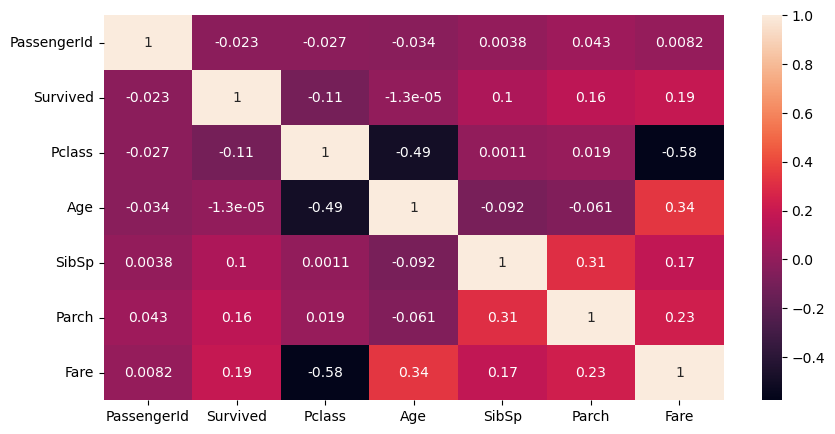

In [17]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_data_num.corr(), annot=True);

In [18]:
correlation = abs(pd.DataFrame(train_data_num.corr().Survived))
correlation

,Survived
PassengerId,0.023245
Survived,1.000000
Pclass,0.108615
Age,0.000013
SibSp,0.099943
Parch,0.159120
Fare,0.191514


<AxesSubplot: >

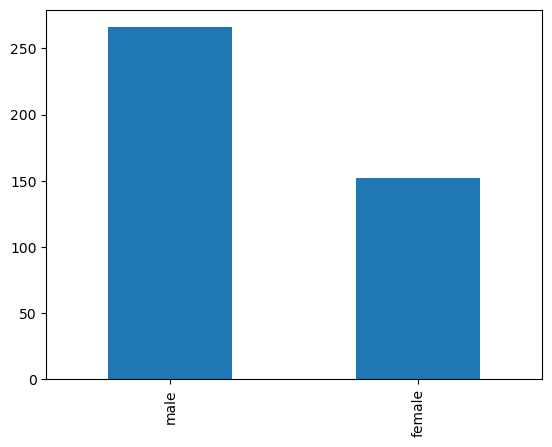

In [19]:
df.Sex.value_counts().plot(kind='bar')

<AxesSubplot: >

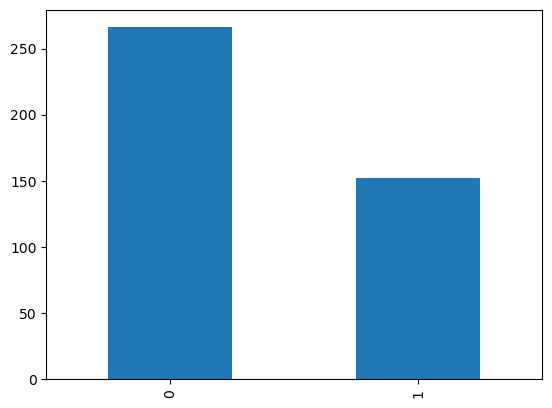

In [20]:
df.Survived.value_counts().plot(kind='bar')

<AxesSubplot: >

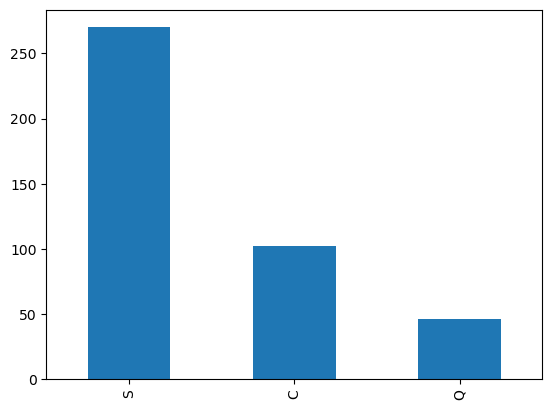

In [21]:
df.Embarked.value_counts().plot(kind='bar')

# Distribution


/tmp/ipykernel_84/250987305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Survived'])


<AxesSubplot: xlabel='Survived', ylabel='Density'>

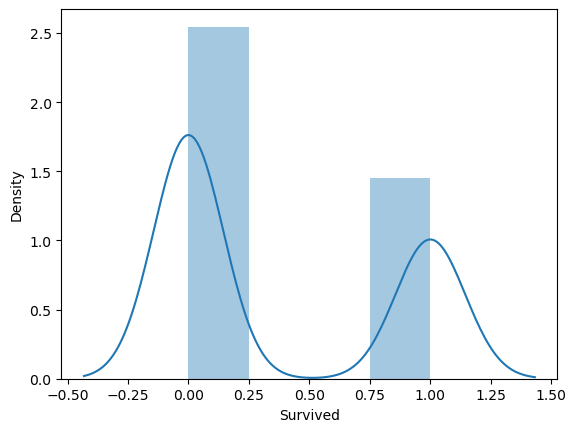

In [22]:
sns.distplot(df['Survived'])

/tmp/ipykernel_84/3683673041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pclass'])


<AxesSubplot: xlabel='Pclass', ylabel='Density'>

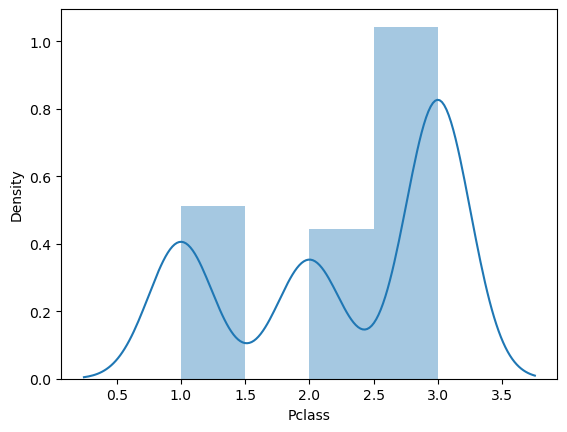

In [23]:
sns.distplot(df['Pclass'])

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

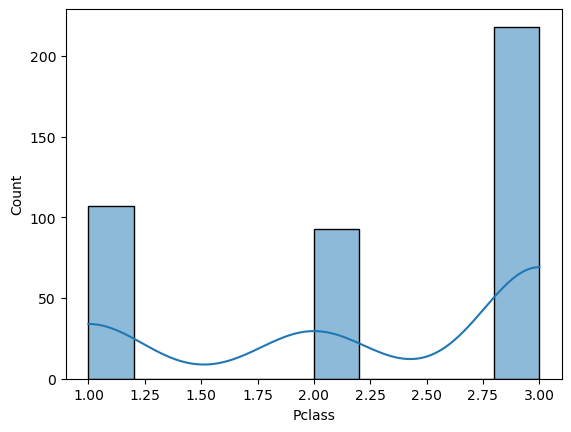

In [24]:
sns.histplot(df['Pclass'],kde=True)

<AxesSubplot: xlabel='Survived', ylabel='Count'>

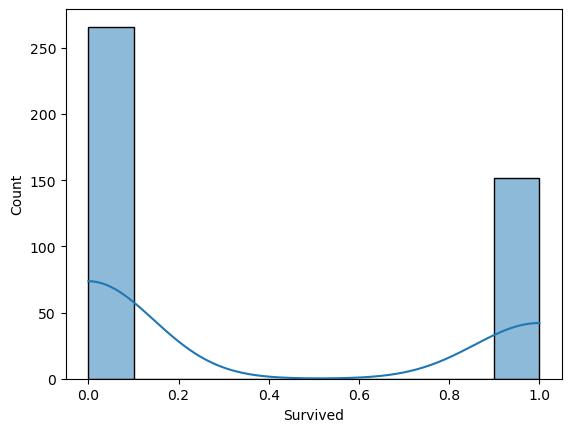

In [25]:
sns.histplot(df['Survived'],kde=True)

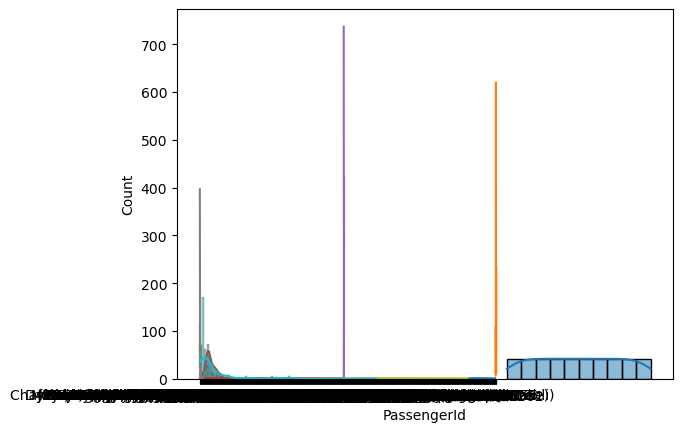

In [26]:
for i in df.columns:
    sns.histplot(df[i],kde=True)

<Figure size 1000x300 with 0 Axes>

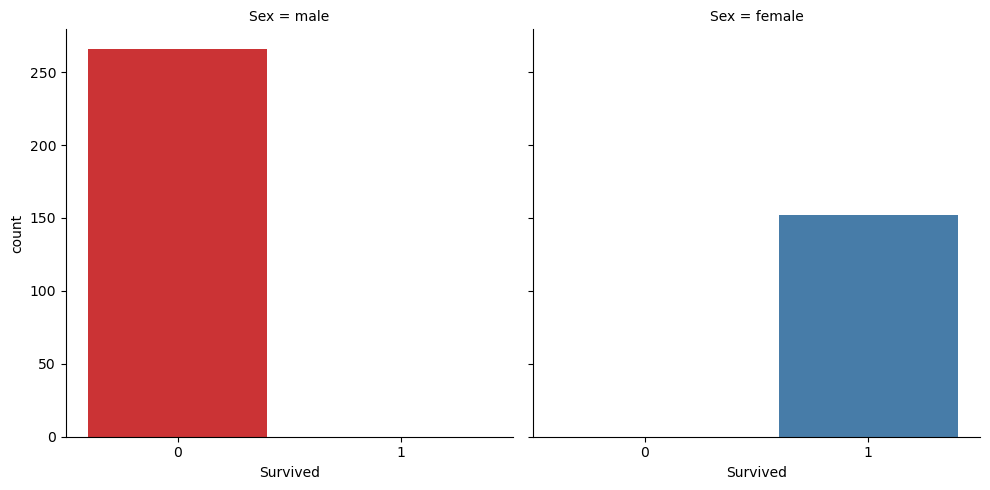

In [27]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=df , palette="Set1");
plt.show()

<Figure size 1000x300 with 0 Axes>

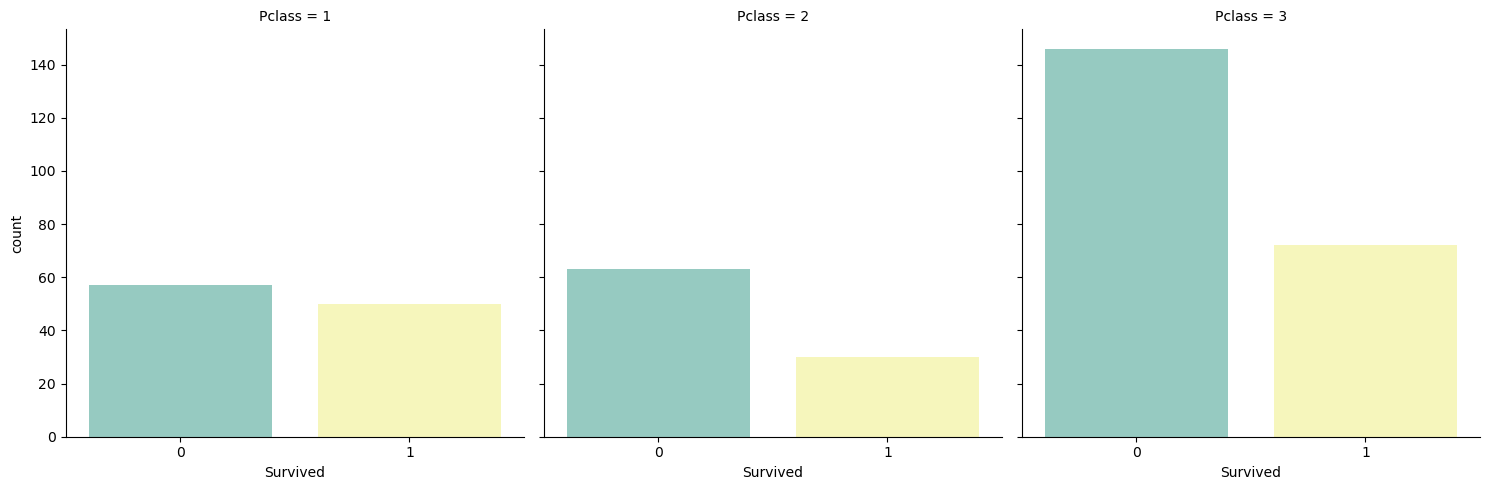

In [28]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=df,palette="Set3");
plt.show()

<Figure size 1000x300 with 0 Axes>

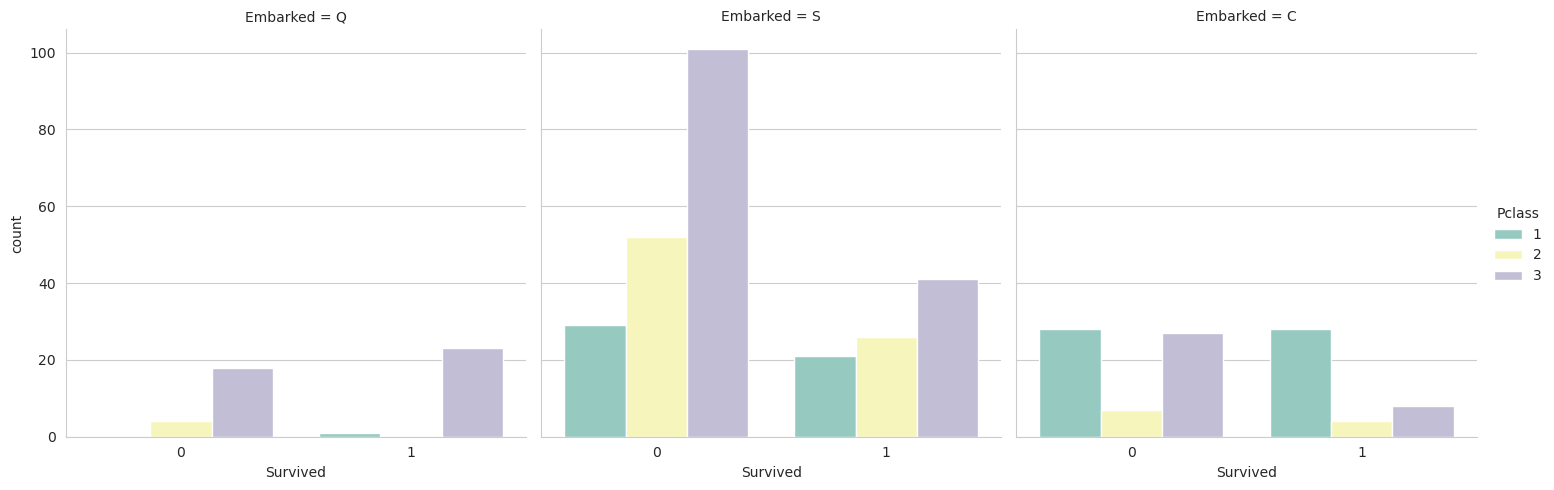

In [29]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', hue = 'Pclass', kind='count', data=df,palette="Set3");
plt.show()

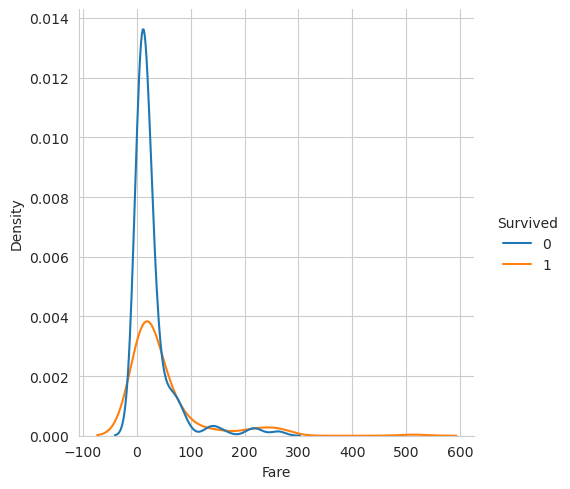

In [30]:
sns.displot(data=df, x="Fare",hue='Survived',kind ='kde')

Let's check Statistical Analysis of Target based on features

In [31]:
## on Sex 
pd.crosstab(df.Sex, df.Survived, normalize = "index" ).style.background_gradient(cmap='crest')

Survived,0,1
Sex,,
female,0.000000,1.000000
male,1.000000,0.000000


In [32]:
pd.crosstab(df.Survived ,df.Pclass,normalize="index").style.background_gradient(cmap='Spectral_r')

Pclass,1,2,3
Survived,,,
0,0.214286,0.236842,0.548872
1,0.328947,0.197368,0.473684


In [33]:
##on Survival 
pd.crosstab(df.Embarked ,df.Survived,normalize="index").style.background_gradient(cmap='Spectral_r')

Survived,0,1
Embarked,,
C,0.607843,0.392157
Q,0.478261,0.521739
S,0.674074,0.325926


In [34]:
pd.crosstab( df.Survived, df.Embarked ,normalize="index").style.background_gradient(cmap='Spectral_r')

Embarked,C,Q,S
Survived,,,
0,0.233083,0.082707,0.684211
1,0.263158,0.157895,0.578947


<AxesSubplot: xlabel='SibSp', ylabel='count'>

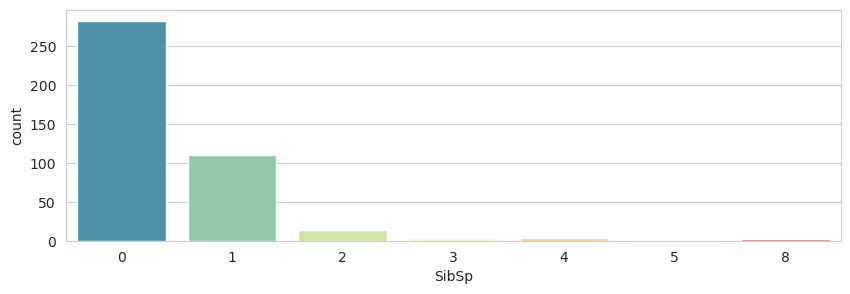

In [35]:
## on Siblings Visualization
plt.figure(figsize=(10,3))
sns.countplot(x='SibSp',data=df,palette='Spectral_r')

<AxesSubplot: xlabel='Parch', ylabel='count'>

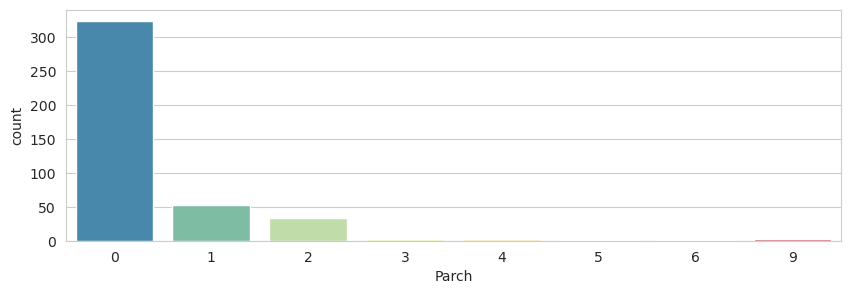

In [36]:
##on Parch
plt.figure(figsize=(10,3))
sns.countplot(x='Parch',data=df,palette='Spectral_r')

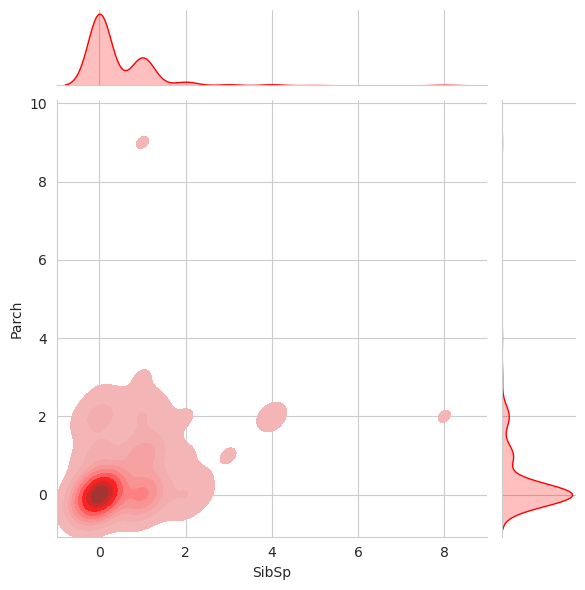

In [37]:
sns.jointplot(x='SibSp',y='Parch',data=df ,color='red',kind='kde', fill =True)

3d image graph

# Data Processing

Text(0.5, 1.0, 'Age on Pclass')

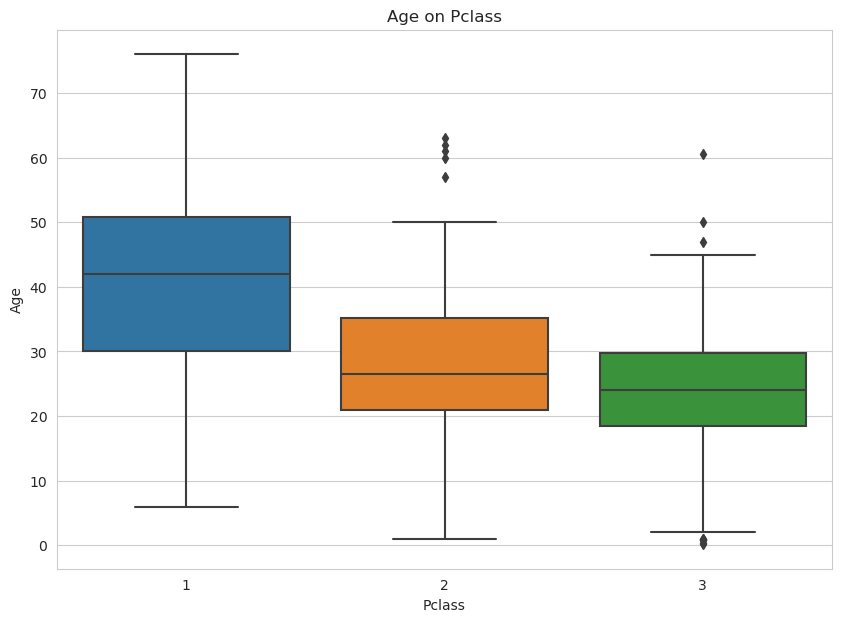

In [38]:
##Age on Pclass
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Age on Pclass')

In [39]:
df['Cabin'].isnull().sum()

327

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
#if we remove cabin
df.drop('Cabin',axis=1,inplace=True)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [43]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [44]:
df.drop('Age',axis=1,inplace=True)

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


In [46]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [47]:
df.drop('Fare',axis=1,inplace=True)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,S


In [49]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

Now there is no missing data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    int64 
 2   Pclass       418 non-null    int64 
 3   Name         418 non-null    object
 4   Sex          418 non-null    object
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Embarked     418 non-null    object
dtypes: int64(5), object(4)
memory usage: 29.5+ KB


In [51]:
Train_data=pd.read_csv('Titanic Dataset.csv')

In [52]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [53]:
Train_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Train and test Split

In [54]:
import pandas as pd
Train_data=pd.read_csv('Titanic Dataset.csv')

In [55]:
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
X=Train_data.drop(['Survived'],axis=1)
Y=Train_data['Survived']

In [57]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [59]:
Train_data=pd.read_csv('Titanic Dataset.csv')
df1=Train_data.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


In [60]:
df1.isnull().sum() 

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [61]:
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


In [62]:
#Mean age of each sex
mean_age_men=df1[df1['Sex']==1]['Age'].mean()
mean_age_women=df1[df1['Sex']==0]['Age'].mean()

In [63]:
#Filling all the null values in 'Age' with respective mean age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=mean_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=mean_age_men

In [64]:
df1.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False


In [65]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [66]:
df1.dropna(inplace=True)

In [67]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,0.364508,2.263789,0.635492,0.396019,0.448441,0.393285,0.069540
std,0.481870,0.842077,0.481870,0.165665,0.897568,0.982419,0.109124
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.396972,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.459317,1.000000,0.000000,0.061484
max,1.000000,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000


# Model Creation

Split train and test data

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df1.Survived  )

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lrmod_test = LogisticRegression()
lrmod_test.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_predict = lrmod_test.predict(X_test)
accuracy_score(y_test, y_predict)

1.0

<AxesSubplot: >

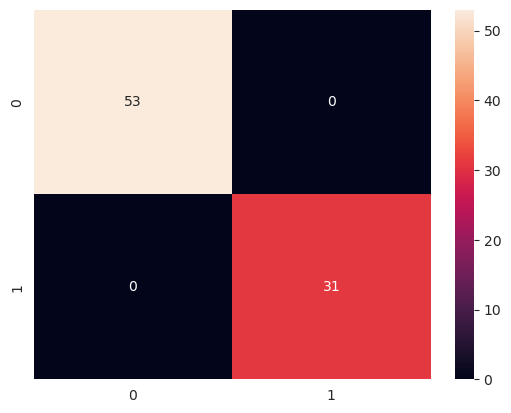

In [72]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cma=confusion_matrix(y_test, y_predict)
sns.heatmap(cma,annot=True)

In [73]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Cleaning data

In [74]:
#that are no longer needed
df2=Train_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [75]:
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,0
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,0
4,1,3,0,22.0,1,1,12.2875,0


In [76]:
df2.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [77]:
mean_age_men2=df2[df2['Sex']==1]['Age'].mean()
mean_age_women2=df2[df2['Sex']==0]['Age'].mean()

In [78]:
#Filling all the null values in 'Age' and 'Fare' with respective mean age and mean fare
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=mean_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=mean_age_men2
df2['Fare']=df2['Fare'].fillna(df2['Fare'].mean())

In [79]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [80]:
#Doing Feature Scaling to standardize the independent features present in the data in a fixed range
df2.Age = (df2.Age-min(df2.Age)) / (max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare)) / (max(df2.Fare)-min(df2.Fare))
df2.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.636364,0.396975,0.447368,0.392344,0.069540
std,0.481622,0.841838,0.481622,0.166617,0.896760,0.981429,0.108993
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.396972,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.469207,1.000000,0.000000,0.061484
max,1.000000,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000


In [81]:
df2['Survived'].unique()

array([0, 1])

In [82]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)

In [86]:
y_pred = LogisticRegression_model.predict(X_test)

In [87]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

# Confusion Matrix

In [88]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[53,  0],
       [ 0, 31]])

In [90]:
print('Accuracy of Logistic Regression model is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model is : ', (metrics.precision_score(y_test, y_pred)))

Accuracy of Logistic Regression model is  :  1.0
Recall of Logistic Regression model is    :  1.0
Precision of Logistic Regression model is :  1.0
